In [3]:
import random
from deap import base
from deap import creator 
from deap import tools
from deap import algorithms

In [4]:
def powerFunction(tab):
    return 100- sum([x*x for x in tab]),

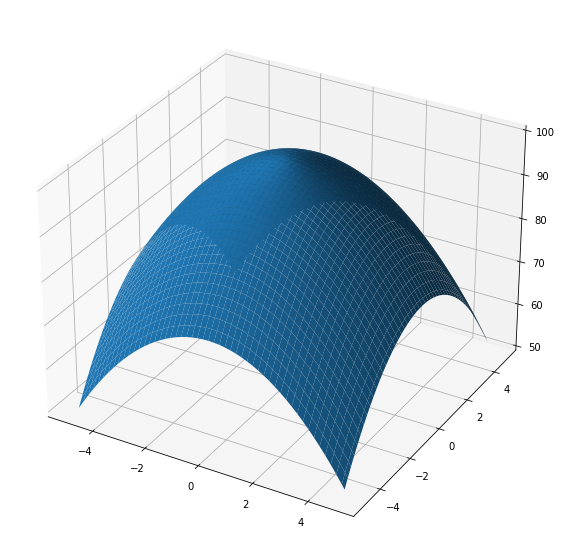

In [6]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig3D = plt.figure()
fig3D.set_figwidth(10)
fig3D.set_figheight(10)

ax = plt.axes(projection='3d')
x = y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(x, y)
zs = np.array(powerFunction([np.ravel(X), np.ravel(Y)]))
Z = zs.reshape(X.shape)
ax.plot_surface(X,Y,Z)
plt.show()

In [7]:
#Dimension number (number of the attributes)
IND_SIZE = 2
#Create type for maximization of the function
creator.create("FitnessMax",base.Fitness,weights=(1.0,))
#Create type for store individual (in this example we use list)
creator.create("Individual", list, fitness=creator.FitnessMax)

In [10]:
#create the modified random function for the initialization of the
#individuals in the domain space <-5,5>
def randDomain():
    return 5 - random.random()*10


In [13]:
#Create toolbox for register needed functions
toolbox = base.Toolbox()

#Register function used for the initialization content of the
#individual (for the benchmark function are the real values)
toolbox.register("attribute_float",randDomain)

#Register function used for the init Population of the individuals
toolbox.register("individual", tools.initRepeat,
creator.Individual, toolbox.attribute_float, n=IND_SIZE)

#Register function for the creating population of individuals
toolbox.register("population",tools.initRepeat, list,toolbox.individual)

In [14]:
#Testing the registered function (look at the content of the individual)
ind1 = toolbox.individual()
ind1

[0.7886953553285476, -3.1197720030013123]

In [15]:
pop = toolbox.population(n=50)
pop

[[-4.102194998118762, -0.34368427944623114],
 [-2.936812677630921, 0.6463707944300312],
 [1.6927014091140045, 3.276070780646446],
 [-2.141272838553226, -2.5678758405946356],
 [-2.3477006606922686, -0.23876665011815756],
 [1.318444674955427, -4.410754273892476],
 [2.1901505400590118, 0.7192706251141123],
 [-4.197714353465109, -2.6423164773064842],
 [-4.0748373097267585, 2.5059998884392365],
 [3.261010786852465, 0.40362437942401463],
 [-2.5706703991953006, -1.4550018729332805],
 [-2.3290433195468836, -1.4514486576280659],
 [-2.867494903798942, -3.6730326027582034],
 [0.4019429695577408, -0.6252066908855589],
 [-2.7376289685244837, -2.642055410574983],
 [-2.480470130034594, 3.1205862097991313],
 [3.8657963391271033, -4.414694056884489],
 [1.3800030342254188, -2.5912026104046717],
 [1.823446012707295, 3.4489207180906556],
 [2.0204874545119713, -2.455709496522722],
 [-1.05438779441306, -2.9682631821878944],
 [-1.8560171434034265, -4.063554754837114],
 [-2.669438580229614, -0.028626598308631

In [23]:
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate",tools.mutGaussian, mu=0, sigma=5,indpb=0.1)
toolbox.register("select",tools.selRoulette)
toolbox.register("evaluate",powerFunction)

In [24]:
def GA_ALG(CXPB,MUTPB,N,NGEN):
    pop = toolbox.population(n=N) #(1)
    
    # Evaluate the entire population #(2)
    # Create maping
    fitnesses = map(toolbox.evaluate, pop)
    # And evaluate each
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
        
    #Loop over generations
    for g in range(NGEN):
        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop)) #(3)
        # Clone the selected individuals
        offspring_map = map(toolbox.clone, offspring)
        offspring = ([x for x in offspring_map])

        # Apply crossover and mutation on the offspring #(4)
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values #for evaluate
                del child2.fitness.values #for evaluate
            
        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values #for evaluate   
            
        # Evaluate the individuals with an invalid fitness #(2)
        # Select part for evaluate
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        # Create maping
        fitnesses = map(toolbox.evaluate, invalid_ind)
        # And evaluate each
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
        # The population is entirely replaced by the offspring
        pop[:] = offspring
    
    return pop

In [25]:
pop = GA_ALG(0.5,0.2,50,50)
pop

[[-1.0042924482272806, -1.999521599165665],
 [-1.0042924482272806, 1.8312413512007497],
 [-5.553144368450667, -1.999521599165665],
 [2.266857390172068, 1.8312413512007497],
 [2.266857390172068, -1.999521599165665],
 [-1.0042924482272806, 10.238559176757725],
 [0.9406700763108502, -1.999521599165665],
 [2.266857390172068, -1.999521599165665],
 [-4.102364297534053, 1.8312413512007497],
 [-1.0042924482272806, 1.8312413512007497],
 [2.266857390172068, 1.8312413512007497],
 [-0.7092678197618227, -1.999521599165665],
 [2.266857390172068, -1.999521599165665],
 [2.266857390172068, 1.8312413512007497],
 [2.266857390172068, 1.8312413512007497],
 [-4.102364297534053, 1.8312413512007497],
 [-1.0042924482272806, 1.8312413512007497],
 [-0.3244556197497479, -1.999521599165665],
 [2.266857390172068, 1.8312413512007497],
 [-1.0042924482272806, 1.8312413512007497],
 [2.266857390172068, 1.8312413512007497],
 [2.266857390172068, 1.8312413512007497],
 [2.266857390172068, 1.8312413512007497],
 [2.2668573901

In [26]:
import numpy
stats = tools.Statistics(key=lambda ind:
ind.fitness.values)
stats.register("avg",numpy.mean)
stats.register("std",numpy.std)
stats.register("min",numpy.min)
stats.register("max",numpy.max)

In [38]:
def GA_ALG(CXPB,MUTPB,N,NGEN,stats):
    pop = toolbox.population(n=N) #(1)
    logbook = tools.Logbook()

    # Evaluate the entire population #(2)
    # Create maping
    fitnesses = map(toolbox.evaluate, pop)
    # And evaluate each
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
        
    #Loop over generations
    for g in range(NGEN):
        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop)) #(3)
        # Clone the selected individuals
        offspring_map = map(toolbox.clone, offspring)
        offspring = ([x for x in offspring_map])

        # Apply crossover and mutation on the offspring #(4)
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values #for evaluate
                del child2.fitness.values #for evaluate
            
        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values #for evaluate   
            
        # Evaluate the individuals with an invalid fitness #(2)
        # Select part for evaluate
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        # Create maping
        fitnesses = map(toolbox.evaluate, invalid_ind)
        # And evaluate each
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
        # The population is entirely replaced by the offspring
        pop[:] = offspring
        
        # Get the statistics from the population
        record = stats.compile(pop)
        # Print results for each generation
        print(record)
        # Include statistics to the loogbok for each generation
        logbook.record(gen=g, evals=len(invalid_ind),
        **stats.compile(pop))
    return pop, logbook

In [44]:
pop, logbook = GA_ALG(0.50,0.2,50,50,stats)
gen, avg = logbook.select('gen','avg')
avg

{'avg': 80.63100728538515, 'std': 12.607234238523692, 'min': 25.59774542374302, 'max': 99.69431806968507}
{'avg': 79.71531704513214, 'std': 16.20125501452206, 'min': -0.5792033548051876, 'max': 99.69431806968507}
{'avg': 81.7252294645941, 'std': 12.43992359094212, 'min': 15.489415689174763, 'max': 99.69431806968507}
{'avg': 81.45287695297787, 'std': 23.15900635699227, 'min': -64.1772395829206, 'max': 99.69431806968507}
{'avg': 87.38304738203999, 'std': 9.470249435035052, 'min': 66.21549087169623, 'max': 99.98155488235089}
{'avg': 88.00191209623888, 'std': 8.837167005390393, 'min': 70.05914559821161, 'max': 99.98155488235089}
{'avg': 87.47703088892148, 'std': 10.883071165332247, 'min': 61.851777101994365, 'max': 99.98155488235089}
{'avg': 89.42762193050352, 'std': 9.461644470449375, 'min': 61.851777101994365, 'max': 99.98155488235089}
{'avg': 91.81569385902073, 'std': 8.500770117734172, 'min': 70.75009541283796, 'max': 99.98155488235089}
{'avg': 91.05959665288205, 'std': 15.654696051690

[80.63100728538515,
 79.71531704513214,
 81.7252294645941,
 81.45287695297787,
 87.38304738203999,
 88.00191209623888,
 87.47703088892148,
 89.42762193050352,
 91.81569385902073,
 91.05959665288205,
 93.2047442382835,
 91.79206775828001,
 92.6907828966406,
 95.05857112580246,
 94.64203841971683,
 93.16912456015415,
 93.0156691017821,
 93.52936612396401,
 94.7799314463553,
 94.6754629366274,
 95.71306863409953,
 95.78203716304927,
 97.11848519553615,
 96.70610237537645,
 95.46928643718647,
 96.14980139750483,
 95.81771732207288,
 97.22050179001012,
 98.0749514893398,
 99.1256879141775,
 95.72481933317952,
 97.11015367890182,
 96.47528783281835,
 98.73735484206767,
 96.7535483002743,
 95.37617118197082,
 97.09657037296336,
 98.10643944092473,
 97.25789781777593,
 97.01547057683975,
 99.43264542931865,
 98.22648881307452,
 97.91524779771439,
 97.41905972771073,
 99.08635115050394,
 98.37173822413251,
 97.22173543380482,
 97.755310987658,
 97.22561663376017,
 96.35905565526497]

{'avg': 84.55525913263793, 'std': 10.242069420648892, 'min': 58.88493750836004, 'max': 99.02184635773705}
{'avg': 86.12385354955477, 'std': 8.430368143730723, 'min': 68.50384042156898, 'max': 99.4641597171997}
{'avg': 86.42397251415083, 'std': 7.971272957233064, 'min': 74.29242586718247, 'max': 99.05634334536808}
{'avg': 88.10523305528639, 'std': 7.0344097576692475, 'min': 75.13070874004352, 'max': 99.05634334536808}
{'avg': 87.06707873701355, 'std': 6.708886298779928, 'min': 66.07212673260904, 'max': 98.04919275693399}
{'avg': 86.15682230721397, 'std': 5.23754200705727, 'min': 76.0908769397505, 'max': 97.35736804522824}
{'avg': 84.82267671150636, 'std': 5.353421614440842, 'min': 76.0908769397505, 'max': 97.35736804522824}
{'avg': 84.4856286367899, 'std': 6.124114490488315, 'min': 75.51615383413001, 'max': 96.25074168436598}
{'avg': 84.85022150515813, 'std': 6.970424968218163, 'min': 74.29242586718247, 'max': 97.4744696513135}
{'avg': 84.53271986885248, 'std': 8.645107409575871, 'min':

{'avg': 96.21067111440124, 'std': 0.12021170989423809, 'min': 95.85003598471852, 'max': 96.25074168436598}
{'avg': 96.23738482771107, 'std': 0.0719288743919904, 'min': 95.85003598471852, 'max': 96.25074168436598}
{'avg': 96.25074168436598, 'std': 0.0, 'min': 96.25074168436598, 'max': 96.25074168436598}
{'avg': 96.25074168436598, 'std': 0.0, 'min': 96.25074168436598, 'max': 96.25074168436598}
{'avg': 96.25074168436598, 'std': 0.0, 'min': 96.25074168436598, 'max': 96.25074168436598}
{'avg': 96.25074168436598, 'std': 0.0, 'min': 96.25074168436598, 'max': 96.25074168436598}
{'avg': 96.25074168436598, 'std': 0.0, 'min': 96.25074168436598, 'max': 96.25074168436598}
{'avg': 96.25074168436598, 'std': 0.0, 'min': 96.25074168436598, 'max': 96.25074168436598}
{'avg': 96.06911128218492, 'std': 0.9781096497310918, 'min': 90.80182961893439, 'max': 96.25074168436598}
{'avg': 95.88748088000388, 'std': 1.3591974719669164, 'min': 90.80182961893439, 'max': 96.25074168436598}
{'avg': 96.25074168436598, 's

{'avg': 97.78067972227277, 'std': 0.5160774982861472, 'min': 96.25074168436598, 'max': 98.18650801398233}
{'avg': 96.24522234585078, 'std': 7.244670759673859, 'min': 57.39945656330204, 'max': 98.18650801398233}
{'avg': 97.64278481451719, 'std': 0.6225406133259273, 'min': 96.25074168436598, 'max': 97.9211934405474}
{'avg': 97.58710308931114, 'std': 0.6681807024725687, 'min': 96.25074168436598, 'max': 97.9211934405474}
{'avg': 97.5314213641051, 'std': 0.7065218878629348, 'min': 96.25074168436598, 'max': 97.9211934405474}
{'avg': 97.11599581824991, 'std': 2.275984130683242, 'min': 85.45842706489236, 'max': 97.9211934405474}
{'avg': 97.58710308931113, 'std': 0.6681807024725686, 'min': 96.25074168436598, 'max': 97.9211934405474}
{'avg': 97.47573963889903, 'std': 0.7387015607525355, 'min': 96.25074168436598, 'max': 97.9211934405474}
{'avg': 97.5314213641051, 'std': 0.7065218878629348, 'min': 96.25074168436598, 'max': 97.9211934405474}
{'avg': 97.58710308931113, 'std': 0.6681807024725686, 'mi

{'avg': 96.01673733982743, 'std': 0.9101208707130083, 'min': 91.16458757374848, 'max': 96.25074168436598}
{'avg': 94.079917825417, 'std': 10.42634627988254, 'min': 38.1461562520529, 'max': 96.25074168436598}
{'avg': 95.85794318183761, 'std': 1.2600091068856807, 'min': 91.16458757374848, 'max': 96.25074168436598}
{'avg': 96.00599302746333, 'std': 0.9091970825734048, 'min': 91.16458757374848, 'max': 96.25074168436598}
{'avg': 96.14054713594834, 'std': 0.3175675442824727, 'min': 94.55655208645243, 'max': 96.25074168436598}
{'avg': 96.17553149781725, 'std': 0.1363300405507597, 'min': 95.92841231344282, 'max': 96.25074168436598}
{'avg': 96.14329856072496, 'std': 0.1519475226369055, 'min': 95.92841231344282, 'max': 96.25074168436598}
{'avg': 96.21334398194105, 'std': 0.3677892388224162, 'min': 95.92841231344282, 'max': 98.02977494992614}
{'avg': 96.18627581018134, 'std': 0.12893174836926277, 'min': 95.92841231344282, 'max': 96.25074168436598}
{'avg': 96.01208548224153, 'std': 0.8187082396445

{'avg': 95.70609850002886, 'std': 10.482057688157756, 'min': 42.130771813753014, 'max': 98.18803393026322}
{'avg': 96.9613138775618, 'std': 4.589966146694115, 'min': 79.7872331397414, 'max': 98.18803393026322}
{'avg': 98.0901011112835, 'std': 0.5273843702332182, 'min': 95.25004936087075, 'max': 98.18803393026322}
{'avg': 97.60818676329099, 'std': 2.630350839334096, 'min': 83.73060349048754, 'max': 98.18803393026322}
{'avg': 97.99216829230376, 'std': 0.732862111086346, 'min': 95.25004936087075, 'max': 98.18803393026322}
{'avg': 97.94021670683115, 'std': 1.3345365902282353, 'min': 90.75351722730076, 'max': 98.18803393026322}
{'avg': 97.1819859764977, 'std': 4.251785979358782, 'min': 75.44111202025955, 'max': 98.18803393026322}
{'avg': 98.18803393026324, 'std': 2.842170943040401e-14, 'min': 98.18803393026322, 'max': 98.18803393026322}
{'avg': 98.18803393026324, 'std': 2.842170943040401e-14, 'min': 98.18803393026322, 'max': 98.18803393026322}
{'avg': 98.18803393026324, 'std': 2.84217094304

{'avg': 97.03197315746482, 'std': 1.4691232216216712, 'min': 90.48364497146878, 'max': 98.18803393026322}
{'avg': 97.17615977958336, 'std': 0.8258792317403664, 'min': 96.4997885247471, 'max': 98.18803393026322}
{'avg': 97.45684416857401, 'std': 0.8353746974402577, 'min': 96.4997885247471, 'max': 98.18803393026322}
{'avg': 97.40087591961772, 'std': 0.8410468228073789, 'min': 96.4997885247471, 'max': 98.18803393026322}
{'avg': 95.68857959099923, 'std': 7.8974960230095865, 'min': 61.952715713028056, 'max': 98.18803393026322}
{'avg': 95.71432792316682, 'std': 8.60448362371081, 'min': 61.95041622882136, 'max': 98.18803393026322}
{'avg': 95.23560787542708, 'std': 8.849546220031879, 'min': 61.95041622882136, 'max': 98.18803393026322}
{'avg': 95.29165277385694, 'std': 8.862988334971906, 'min': 61.95041622882136, 'max': 98.18803393026322}
{'avg': 97.48553930345197, 'std': 2.600140316921487, 'min': 83.82643249807099, 'max': 98.22777818018245}
{'avg': 96.32992100050683, 'std': 9.396463838119974, 

{'avg': 98.03151299302185, 'std': 1.0569203787631891, 'min': 92.33982256536301, 'max': 98.22777818018245}
{'avg': 97.8352478058612, 'std': 1.4687141746124188, 'min': 92.33982256536301, 'max': 98.22777818018245}
{'avg': 97.8352478058612, 'std': 1.4687141746124188, 'min': 92.33982256536301, 'max': 98.22777818018245}
{'avg': 98.03151299302185, 'std': 1.0569203787631891, 'min': 92.33982256536301, 'max': 98.22777818018245}
{'avg': 97.8352478058612, 'std': 1.4687141746124188, 'min': 92.33982256536301, 'max': 98.22777818018245}
{'avg': 98.06880212177421, 'std': 0.8561122749172957, 'min': 93.45849642793368, 'max': 98.22777818018245}
{'avg': 97.75085000495761, 'std': 1.2011696171720925, 'min': 94.21070581709755, 'max': 98.22777818018245}
{'avg': 97.88475241706047, 'std': 1.0073264517357494, 'min': 94.21070581709755, 'max': 98.22777818018245}
{'avg': 97.99358118285782, 'std': 0.7473218678313647, 'min': 94.21070581709755, 'max': 98.22777818018245}
{'avg': 98.04372847546874, 'std': 0.7360316905857

{'avg': 98.31172501932124, 'std': 0.31410031075982364, 'min': 98.22777818018245, 'max': 99.48698076726369}
{'avg': 98.26975159975187, 'std': 0.22603378190008605, 'min': 98.22777818018245, 'max': 99.48698076726369}
{'avg': 98.26975159975187, 'std': 0.22603378190008605, 'min': 98.22777818018245, 'max': 99.48698076726369}
{'avg': 98.2277781801825, 'std': 4.263256414560601e-14, 'min': 98.22777818018245, 'max': 98.22777818018245}
{'avg': 98.2277781801825, 'std': 4.263256414560601e-14, 'min': 98.22777818018245, 'max': 98.22777818018245}
{'avg': 98.2277781801825, 'std': 4.263256414560601e-14, 'min': 98.22777818018245, 'max': 98.22777818018245}
{'avg': 98.2277781801825, 'std': 4.263256414560601e-14, 'min': 98.22777818018245, 'max': 98.22777818018245}
{'avg': 98.2277781801825, 'std': 4.263256414560601e-14, 'min': 98.22777818018245, 'max': 98.22777818018245}
{'avg': 97.75454872546412, 'std': 2.548418605248809, 'min': 84.0308945386314, 'max': 98.22777818018245}
{'avg': 97.77812360289913, 'std': 2

{'avg': 98.0842889101532, 'std': 0.7309671970517504, 'min': 97.37520700678982, 'max': 99.0757024386956}
{'avg': 98.11270794926628, 'std': 0.8985490967991292, 'min': 97.37520700678982, 'max': 99.92827361208823}
{'avg': 98.0277606262523, 'std': 0.8125695499163029, 'min': 97.37520700678982, 'max': 99.92827361208823}
{'avg': 97.74418982377205, 'std': 0.5680008158695573, 'min': 97.37520700678982, 'max': 99.0757024386956}
{'avg': 97.65908760359541, 'std': 0.5951631719184829, 'min': 97.37520700678982, 'max': 99.92827361208823}
{'avg': 97.432045085016, 'std': 0.21266861524500477, 'min': 97.37520700678982, 'max': 98.22777818018245}
{'avg': 97.48888316324219, 'std': 0.2898184699903822, 'min': 97.37520700678982, 'max': 98.22777818018245}
{'avg': 97.48888316324219, 'std': 0.2898184699903822, 'min': 97.37520700678982, 'max': 98.22777818018245}
{'avg': 97.432045085016, 'std': 0.21266861524500477, 'min': 97.37520700678982, 'max': 98.22777818018245}
{'avg': 97.40362604590291, 'std': 0.1530412092843792

{'avg': 97.48174650957587, 'std': 0.3196185083580914, 'min': 97.37520700678982, 'max': 98.44060203465013}
{'avg': 93.72457042518434, 'std': 20.453824767555435, 'min': -16.405470552816283, 'max': 98.44060203465013}
{'avg': 97.20033200199941, 'std': 1.1554868139766807, 'min': 91.0635618352166, 'max': 98.44060203465013}
{'avg': 97.16481883440406, 'std': 1.132974981769217, 'min': 91.0635618352166, 'max': 97.37520700678982}
{'avg': 97.37520700678984, 'std': 1.4210854715202004e-14, 'min': 97.37520700678982, 'max': 97.37520700678982}
{'avg': 97.37520700678984, 'std': 1.4210854715202004e-14, 'min': 97.37520700678982, 'max': 97.37520700678982}
{'avg': 97.37520700678984, 'std': 1.4210854715202004e-14, 'min': 97.37520700678982, 'max': 97.37520700678982}
{'avg': 97.37520700678984, 'std': 1.4210854715202004e-14, 'min': 97.37520700678982, 'max': 97.37520700678982}
{'avg': 96.41987535450033, 'std': 5.144618393051087, 'min': 68.71525743810474, 'max': 97.37520700678982}
{'avg': 96.41987535450033, 'std'

No handles with labels found to put in legend.



{'avg': 96.53023518500682, 'std': 2.154263903853821, 'min': 91.0379183434172, 'max': 97.37520700678982}
{'avg': 96.74147814045256, 'std': 1.9011865990117855, 'min': 91.0379183434172, 'max': 97.37520700678982}
{'avg': 96.53023518500682, 'std': 2.154263903853821, 'min': 91.0379183434172, 'max': 97.37520700678982}
{'avg': 95.92275862108723, 'std': 2.698522242947554, 'min': 91.0379183434172, 'max': 98.16277607932004}
{'avg': 95.97925992541069, 'std': 2.7265608537543375, 'min': 91.0379183434172, 'max': 98.16277607932004}
{'avg': 95.75767147348935, 'std': 3.3732647533486997, 'min': 83.72259669789003, 'max': 98.16277607932004}
{'avg': 94.8541908494665, 'std': 4.824863389578577, 'min': 74.05490582226253, 'max': 98.16277607932004}
{'avg': 93.02736418681988, 'std': 10.116415399220527, 'min': 49.24154953939149, 'max': 98.16277607932004}
{'avg': 93.2621233431261, 'std': 6.926672433044577, 'min': 74.05490582226253, 'max': 98.16277607932004}
{'avg': 90.71885026922759, 'std': 8.294799284497344, 'min

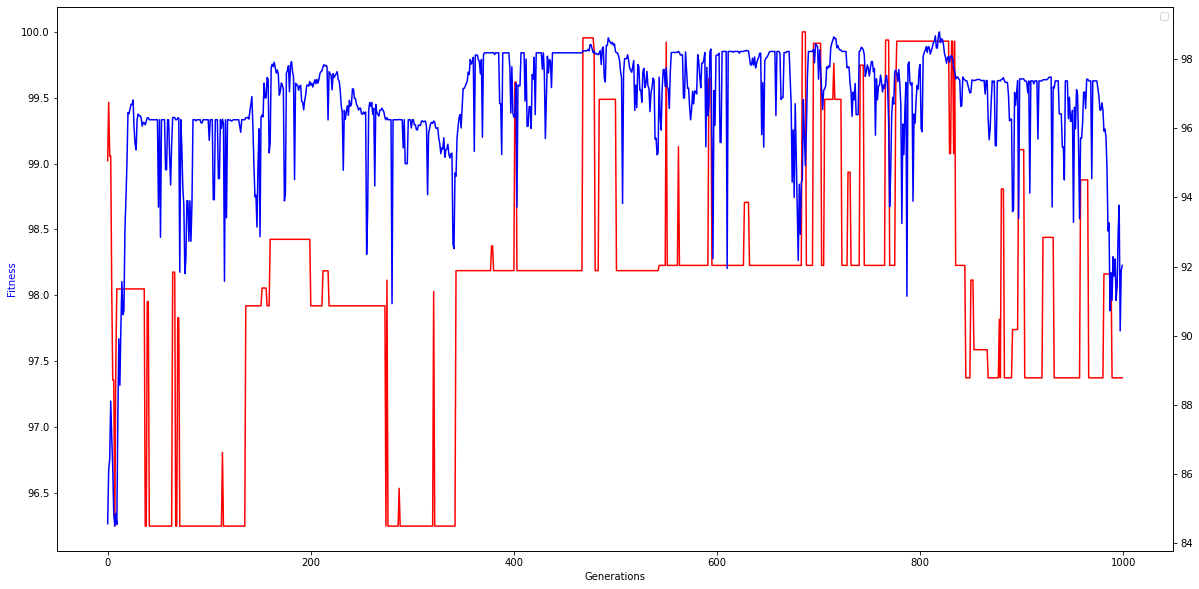

In [82]:
# Run algorithm again with the included statistics
pop, logbook = GA_ALG(0.60,0.05,30,1000,stats)
# Get statistics from the logbook (defined ealier keys can be used)
gen, avg, std, Min, Max = logbook.select('gen','avg','std','min','max');
# Import library for ploting results
import matplotlib.pyplot as plt
# Create figure (fig) and axes (ax1)
fig, ax1 = plt.subplots()
# Define width and height of the plot
fig.set_figwidth(20)
fig.set_figheight(10)
# Plot max value of the fitness function (best solutions)
line1 = ax1.plot(gen, Max, "r-")
ax1.legend()
# Create next axis and plot average value of the fitness function
ax2 = ax1.twinx()
line2 = ax2.plot(gen, avg, "b-")
# Set labels for the axis
ax1.set_xlabel("Generations")
ax1.set_ylabel("Fitness", color="b")
# Plot results
plt.show()